In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm

In [4]:
data = pd.read_csv('incercare.csv')
print(data.shape)
data.head()

(2922, 170)


,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.000000,0.410959,0.142420,1.0,0.0,0.0,0.0,0.555556,0.500,0.637681,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.048246,1.0,1.0,0.0,0.0,0.444444,0.625,0.644928,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.205479,0.060609,1.0,0.0,0.0,0.0,0.555556,0.625,0.623188,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.246575,0.046087,1.0,1.0,0.0,0.0,0.666667,0.500,0.695652,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.181507,0.058566,1.0,0.0,0.0,0.0,0.444444,0.500,0.905797,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
X = data.copy()
X = data.drop(["SalePrice"], axis='columns')
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical:", cat_cols)
print("Numeric:", num_cols)

Categorical: []
Numeric: ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold', 'HasFence', 'GrLivArea_winsor', 'avg_price_at_neighborhood', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[num_cols])
X_scaled.shape

(2922, 169)

In [7]:
pca = PCA(n_components=0.98)
X_pca = pca.fit_transform(X_scaled)

print("New shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

New shape: (2922, 87)
Explained variance ratio: [0.15758532 0.08662478 0.0593984  0.04565257 0.03938193 0.03599502
 0.03331335 0.03198692 0.03045699 0.02807989 0.02591116 0.02545895
 0.0231842  0.02094069 0.01989461 0.0183666  0.01704934 0.01530546
 0.01371091 0.01340341 0.01232185 0.01099013 0.01053446 0.00986475
 0.00939736 0.00847877 0.00765202 0.0075877  0.00719628 0.00713802
 0.00702233 0.00655594 0.00590456 0.00562394 0.0055746  0.00508097
 0.00499681 0.00481441 0.00465925 0.00432776 0.00418664 0.00409714
 0.00405616 0.0038519  0.00371694 0.00367409 0.00351128 0.00342355
 0.00338239 0.0032987  0.00305044 0.00282437 0.00259957 0.00245167
 0.0023136  0.0022565  0.0021928  0.00210394 0.0020788  0.00197596
 0.00187353 0.00180364 0.00164324 0.00155383 0.00150874 0.00147291
 0.00145969 0.00139364 0.00132393 0.0012999  0.0012349  0.00117761
 0.00116983 0.0011394  0.00107825 0.00104742 0.00100735 0.0009804
 0.00095178 0.00089421 0.0008903  0.00087001 0.00085524 0.00082821
 0.00077969 0.0

In [8]:
cum = np.cumsum(pca.explained_variance_ratio_)

n_98 = np.argmax(cum >= 0.98) + 1
n_95 = np.argmax(cum >= 0.95) + 1
n_90 = np.argmax(cum >= 0.90) + 1
n_80 = np.argmax(cum >= 0.80) + 1

print("Components for 98% variance:", n_98)
print("Components for 95% variance:", n_95)
print("Components for 90% variance:", n_90)
print("Components for 80% variance:", n_80)


Components for 98% variance: 87
Components for 95% variance: 61
Components for 90% variance: 44
Components for 80% variance: 26


In [9]:
pca_n_95 = PCA(n_components=n_95)
pca_n_90 = PCA(n_components=n_90)
pca_n_80 = PCA(n_components=n_80)

X_pca_95 = pca_n_95.fit_transform(X_scaled)
X_pca_90 = pca_n_90.fit_transform(X_scaled)
X_pca_80 = pca_n_80.fit_transform(X_scaled)

print("Shapes: ", X_pca_95.shape, X_pca_90.shape, X_pca_80.shape)

Shapes:  (2922, 61) (2922, 44) (2922, 26)


**Elbow, silhoutte, scatter for 80%**

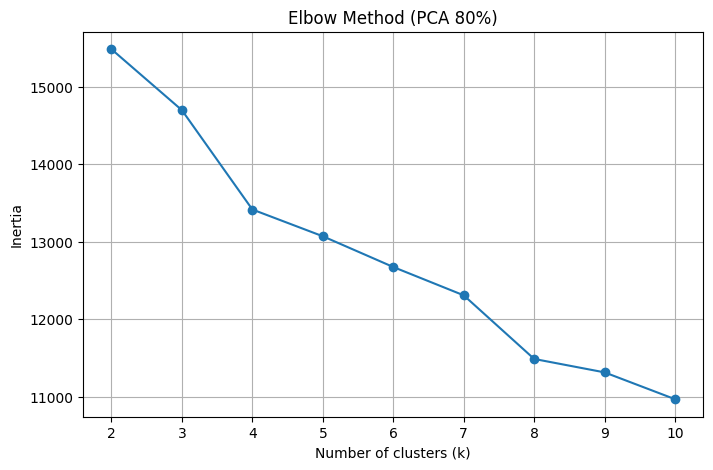

In [10]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_80)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 80%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [11]:
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


2 15481.140321526233
3 14694.647531196533
4 13412.943854024985
5 13067.795535461355
6 12671.042083078195
7 12305.652466023892
8 11484.745252561339
9 11311.44463513241
10 10965.23050880204
2 → 3 drop: 786.4927903296993
3 → 4 drop: 1281.7036771715484
4 → 5 drop: 345.1483185636298
5 → 6 drop: 396.75345238316004
6 → 7 drop: 365.389617054303
7 → 8 drop: 820.907213462553
8 → 9 drop: 173.3006174289294
9 → 10 drop: 346.21412633036925


3->4 is the biggest drop on pca_80 => k=4

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_80)
np.bincount(labels)

array([ 551, 1030,  562,  779])

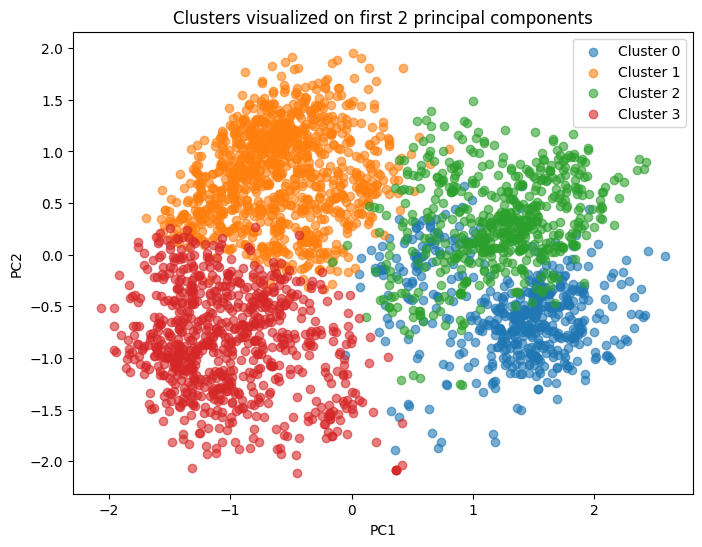

In [13]:
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_80[labels==cluster, 0], 
        X_pca_80[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components")
plt.legend()
plt.show()


in dreapta (pe axa P1) sunt case cu o fundatie+exterior mai bun, deci accentul se pune pe calitate
cele din sus (pe axa P2) sunt case cu un etaj si garaj atasat

Foundation_PConc             0.405951
Exterior 1st_VinylSd         0.355240
Exterior 2nd_VinylSd         0.352230
Foundation_CBlock           -0.292543
Year Remod/Add               0.249710
Garage Type_Detchd          -0.239174
Garage Finish               -0.229231
Garage Type_Attchd           0.228645
Fireplaces                   0.199576
avg_price_at_neighborhood    0.194462
Name: PC1, dtype: float64


House Style_1Story    0.310778
Garage Type_Attchd    0.285376
MS Zoning_RL          0.240814
House Style_2Story   -0.231947
Foundation_CBlock     0.226034
Garage Type_Detchd   -0.196857
MS Zoning_RM         -0.179969
BsmtFin Type 1       -0.155067
Roof Style_Hip        0.146050
Roof Style_Gable     -0.144582
Name: PC2, dtype: float64

In [14]:
score = silhouette_score(X_pca_80, labels)
print("Silhouette score:", score)


Silhouette score: 0.12172498583220515


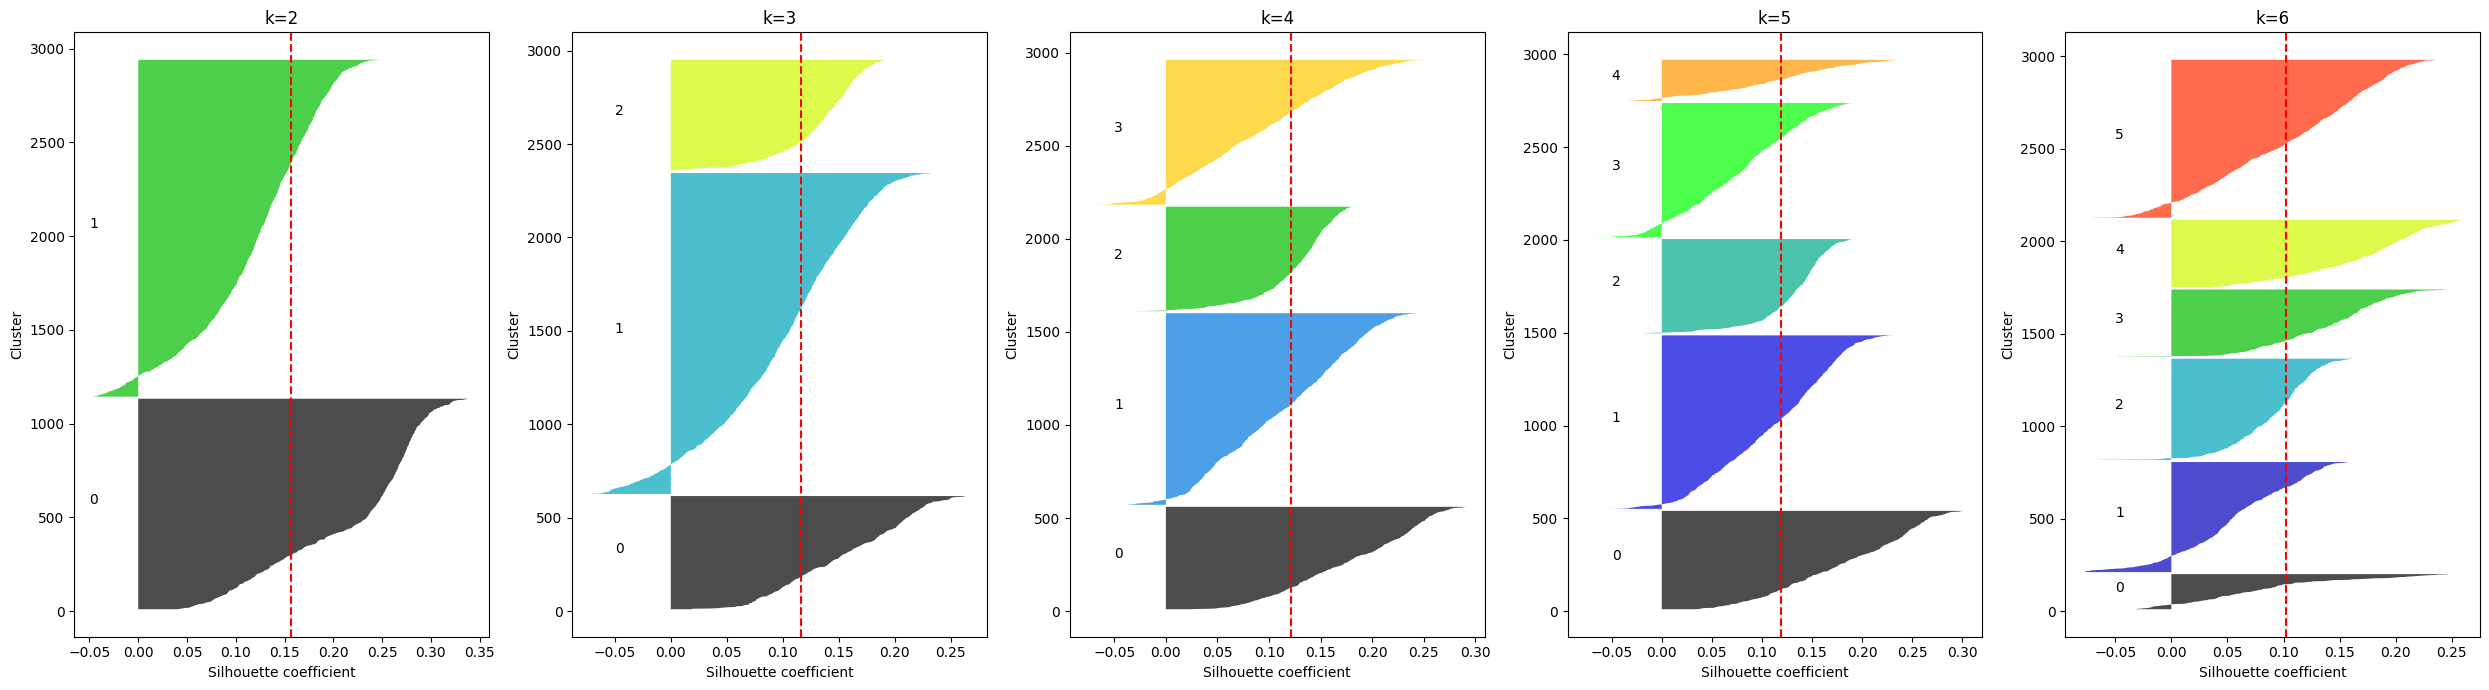

In [15]:
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_80)
    
    silhouette_vals = silhouette_samples(X_pca_80, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [16]:
loadings = pca_n_80.components_.T * np.sqrt(pca_n_80.explained_variance_)

In [17]:
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=num_cols 
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
MS SubClass,-0.004299,-0.097803,-0.069014,-0.025881,-0.067760,-0.020960,0.051785,0.048012,-0.013229,-0.025796,...,-0.003995,-0.006493,-0.012914,-0.033103,-0.033554,0.103080,0.014974,0.050949,0.067483,0.003494
Lot Frontage,0.016639,0.021934,-0.006194,-0.003675,0.015916,-0.001815,-0.011245,-0.010448,0.005816,-0.001998,...,-0.001124,-0.004812,0.006964,0.001710,-0.002264,-0.021554,-0.006822,-0.002115,0.006477,0.002473
Lot Area,0.003613,0.008258,-0.004451,-0.002436,0.006045,0.000042,-0.006225,-0.000364,0.000609,-0.001813,...,-0.001883,-0.004413,0.004904,-0.000526,0.001179,-0.005962,-0.002885,-0.000188,0.001841,-0.000468
Street,0.004574,0.000518,-0.002193,0.001795,-0.000698,0.001059,0.000458,-0.001330,0.001330,0.003128,...,0.000683,0.002907,-0.004047,-0.000986,0.000315,-0.002330,0.002130,0.000937,-0.001079,0.000141
Lot Shape,-0.156597,-0.125572,0.118351,-0.001627,-0.023502,0.001730,0.210490,-0.063639,0.167985,0.022677,...,0.103769,-0.042703,0.073136,-0.060100,0.030885,0.001085,-0.024220,-0.014141,-0.000013,-0.011424


In [18]:
def top_features(pc, n=10):
    sorted_loadings = loadings_df[pc].abs().sort_values(ascending=False).head(n)
    return loadings_df[pc].loc[sorted_loadings.index].head(n)

print(top_features("PC1", 10))
print('\n')
print(top_features("PC2", 10))


Foundation_PConc             0.405951
Exterior 1st_VinylSd         0.355240
Exterior 2nd_VinylSd         0.352230
Foundation_CBlock           -0.292543
Year Remod/Add               0.249710
Garage Type_Detchd          -0.239174
Garage Finish               -0.229231
Garage Type_Attchd           0.228645
Fireplaces                   0.199576
avg_price_at_neighborhood    0.194462
Name: PC1, dtype: float64


House Style_1Story    0.310778
Garage Type_Attchd    0.285376
MS Zoning_RL          0.240814
House Style_2Story   -0.231947
Foundation_CBlock     0.226034
Garage Type_Detchd   -0.196857
MS Zoning_RM         -0.179969
BsmtFin Type 1       -0.155067
Roof Style_Hip        0.146050
Roof Style_Gable     -0.144582
Name: PC2, dtype: float64


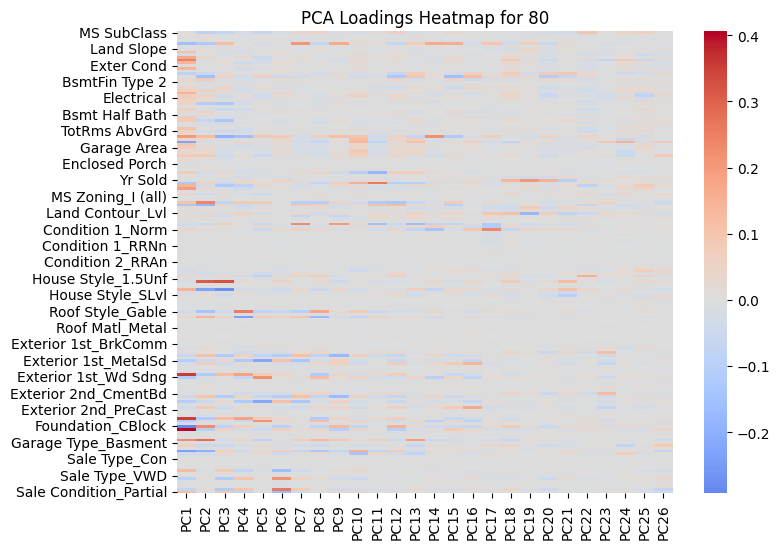

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap for 80")
plt.show()

**Elbow, silhouette, scatter for 90%**

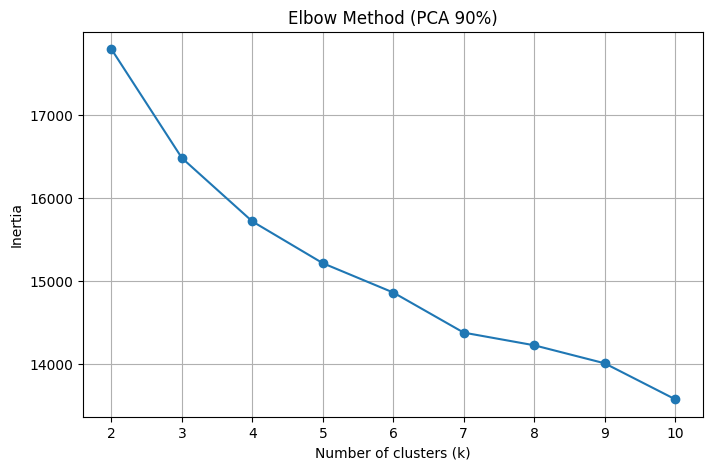

2 17786.39280778119
3 16476.358091885435
4 15713.19933927132
5 15210.407106299353
6 14857.36475291127
7 14374.861106530341
8 14222.548432112675
9 14005.66398908639
10 13573.142189321867
2 → 3 drop: 1310.0347158957557
3 → 4 drop: 763.1587526141157
4 → 5 drop: 502.79223297196586
5 → 6 drop: 353.04235338808394
6 → 7 drop: 482.50364638092833
7 → 8 drop: 152.31267441766613
8 → 9 drop: 216.88444302628523
9 → 10 drop: 432.52179976452317


In [20]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_90)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 90%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


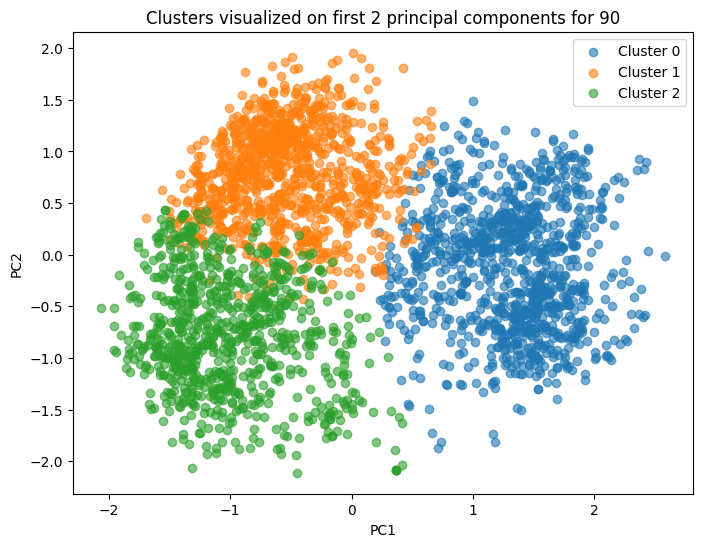

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_90)
np.bincount(labels)
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_90[labels==cluster, 0], 
        X_pca_90[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components for 90")
plt.legend()
plt.show()


Foundation_PConc             0.405951
Exterior 1st_VinylSd         0.355240
Exterior 2nd_VinylSd         0.352230
Foundation_CBlock           -0.292543
Year Remod/Add               0.249710
Garage Type_Detchd          -0.239174
Garage Finish               -0.229231
Garage Type_Attchd           0.228645
Fireplaces                   0.199576
avg_price_at_neighborhood    0.194462
Name: PC1, dtype: float64


House Style_1Story    0.310778
Garage Type_Attchd    0.285376
MS Zoning_RL          0.240814
House Style_2Story   -0.231947
Foundation_CBlock     0.226034
Garage Type_Detchd   -0.196857
MS Zoning_RM         -0.179969
BsmtFin Type 1       -0.155067
Roof Style_Hip        0.146050
Roof Style_Gable     -0.144582
Name: PC2, dtype: float64

Silhouette score: 0.1278009407903354


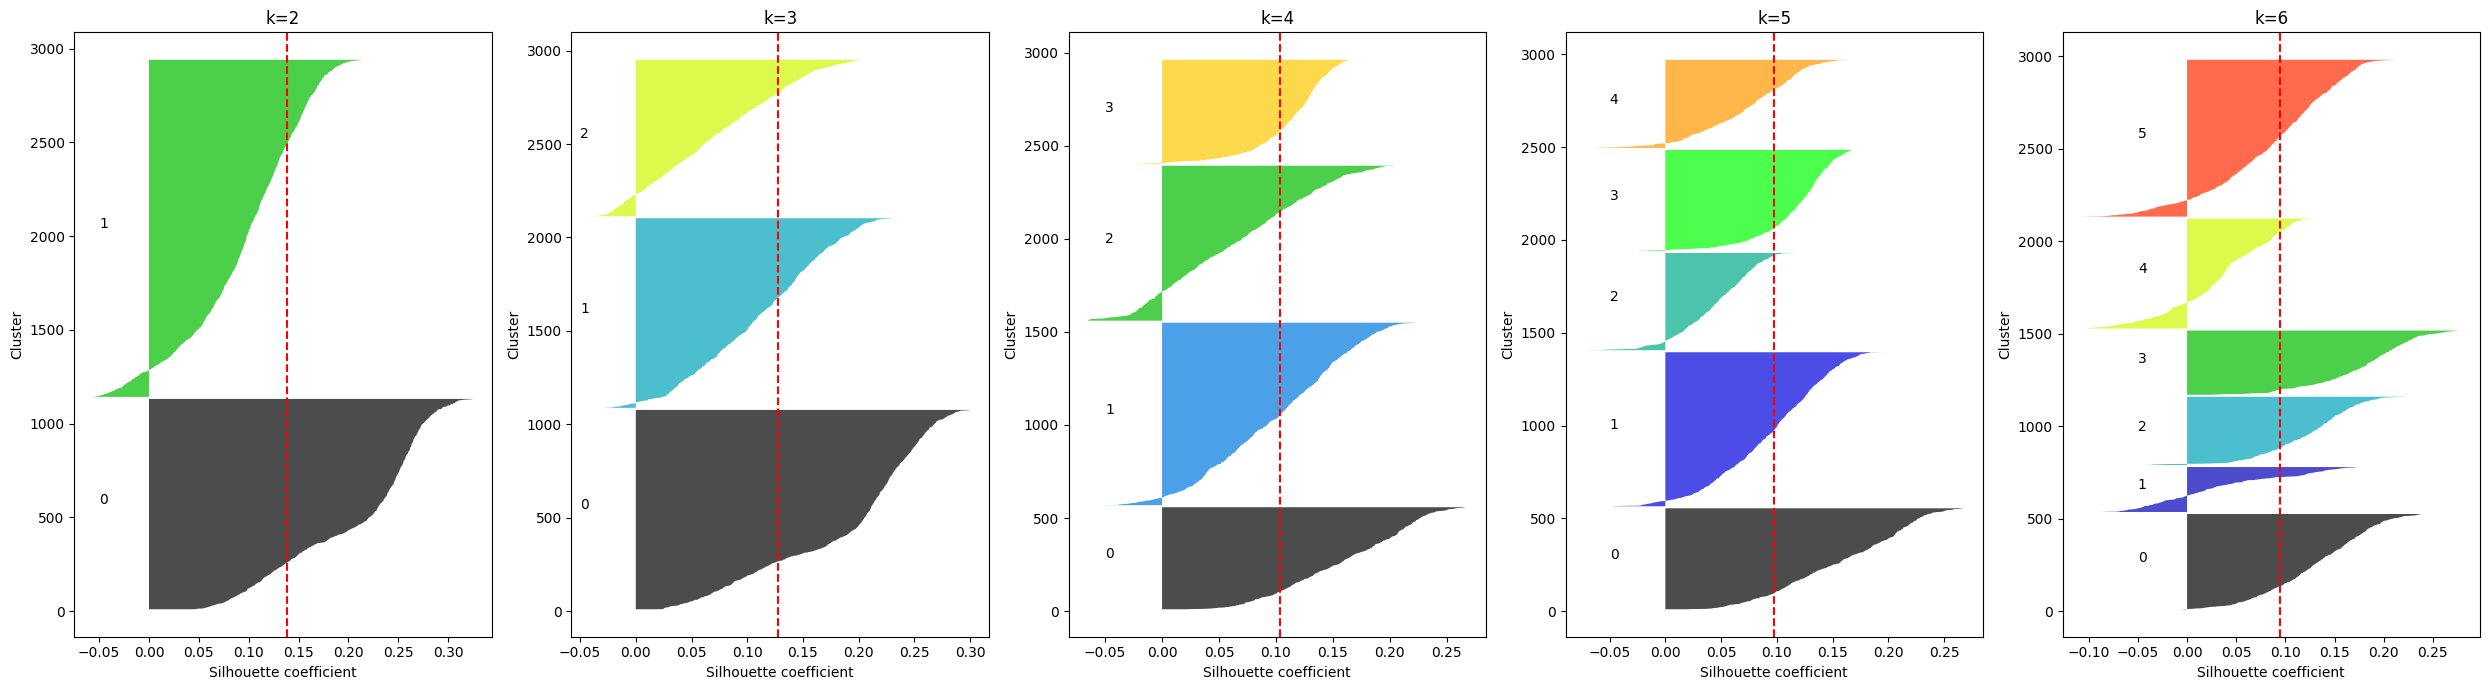

In [22]:
score = silhouette_score(X_pca_90, labels)
print("Silhouette score:", score)
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_90)
    
    silhouette_vals = silhouette_samples(X_pca_90, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [23]:
loadings = pca_n_90.components_.T * np.sqrt(pca_n_90.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=num_cols 
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
MS SubClass,-0.004299,-0.097803,-0.069014,-0.025881,-0.067760,-0.020960,0.051785,0.048012,-0.013229,-0.025796,...,0.018951,0.014844,0.054222,-0.008434,0.000592,-0.001279,-0.000990,0.022438,0.001992,-0.021765
Lot Frontage,0.016639,0.021934,-0.006194,-0.003675,0.015916,-0.001815,-0.011245,-0.010448,0.005816,-0.001998,...,-0.009485,0.003968,-0.007906,0.001200,0.005560,0.003605,0.001942,-0.001225,-0.006581,-0.000873
Lot Area,0.003613,0.008258,-0.004451,-0.002436,0.006045,0.000042,-0.006225,-0.000364,0.000609,-0.001813,...,-0.002096,0.000725,0.001371,0.001436,0.001885,0.003779,0.003787,0.001198,0.001843,-0.000675
Street,0.004574,0.000518,-0.002193,0.001795,-0.000698,0.001059,0.000458,-0.001330,0.001330,0.003128,...,0.003030,-0.005630,-0.000354,-0.001405,-0.001852,-0.001287,-0.000128,-0.000354,0.002246,0.002022
Lot Shape,-0.156597,-0.125572,0.118351,-0.001627,-0.023502,0.001730,0.210490,-0.063639,0.167985,0.022677,...,0.005927,-0.006078,-0.008294,-0.001228,-0.001518,-0.004751,-0.000014,-0.003420,0.000378,0.003260


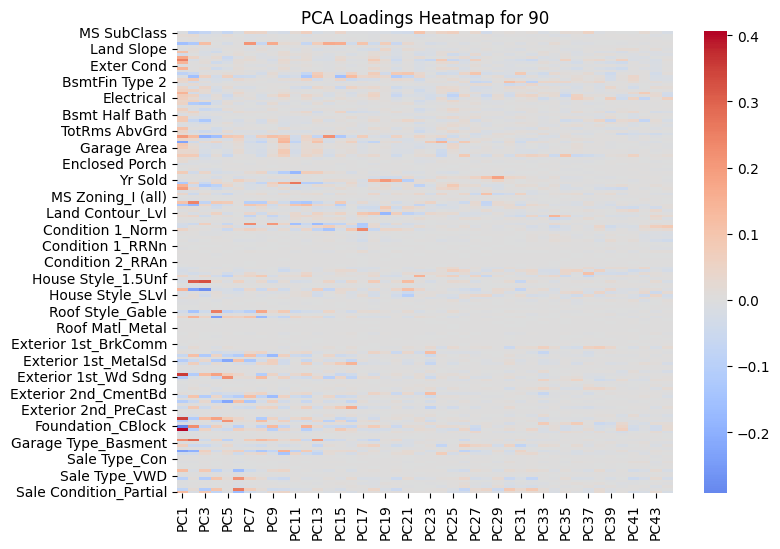

In [24]:
def top_features(pc, n=10):
    return loadings_df[pc].abs().sort_values(ascending=False).head(n)

top_features("PC1", 10)
top_features("PC2", 10)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap for 90")
plt.show()

**Elbow, silhouette, scatter for 95%**

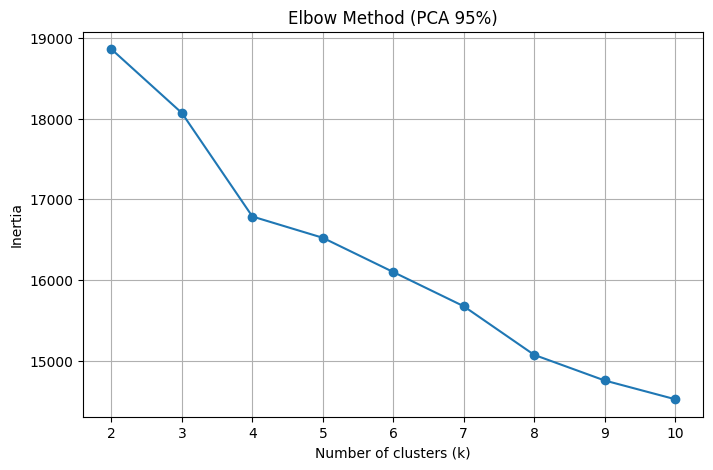

2 18860.152681836327
3 18068.7865715998
4 16785.74974194625
5 16521.58903276288
6 16096.964199292877
7 15672.942188607478
8 15069.918645700776
9 14752.289337935537
10 14519.855661405032
2 → 3 drop: 791.3661102365259
3 → 4 drop: 1283.0368296535526
4 → 5 drop: 264.16070918336845
5 → 6 drop: 424.62483347000307
6 → 7 drop: 424.02201068539944
7 → 8 drop: 603.0235429067016
8 → 9 drop: 317.629307765239
9 → 10 drop: 232.43367653050518


In [25]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_95)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 95%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


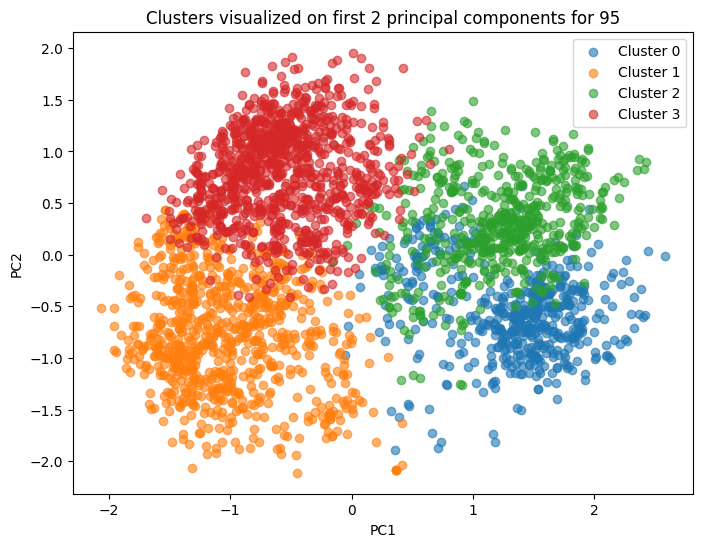

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_95)
np.bincount(labels)
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_95[labels==cluster, 0], 
        X_pca_95[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components for 95")
plt.legend()
plt.show()


Foundation_PConc             0.405951
Exterior 1st_VinylSd         0.355240
Exterior 2nd_VinylSd         0.352230
Foundation_CBlock           -0.292543
Year Remod/Add               0.249710
Garage Type_Detchd          -0.239174
Garage Finish               -0.229231
Garage Type_Attchd           0.228645
Fireplaces                   0.199576
avg_price_at_neighborhood    0.194462
Name: PC1, dtype: float64


House Style_1Story    0.310778
Garage Type_Attchd    0.285376
MS Zoning_RL          0.240814
House Style_2Story   -0.231947
Foundation_CBlock     0.226034
Garage Type_Detchd   -0.196857
MS Zoning_RM         -0.179969
BsmtFin Type 1       -0.155067
Roof Style_Hip        0.146050
Roof Style_Gable     -0.144582
Name: PC2, dtype: float64

In [27]:
df = pd.read_csv('AmesHousing.csv', sep='\t')
print(df.shape)
df.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


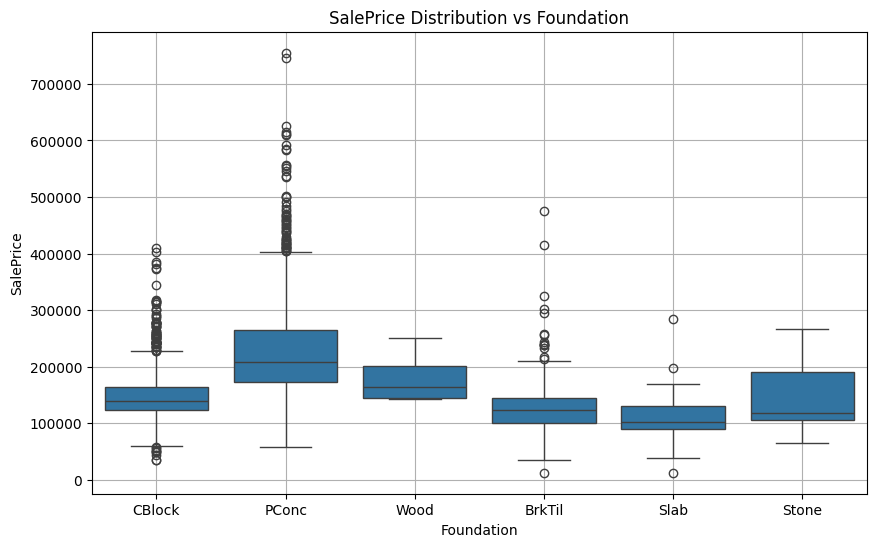

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Foundation', y='SalePrice')
plt.title("SalePrice Distribution vs Foundation")
plt.xlabel("Foundation")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

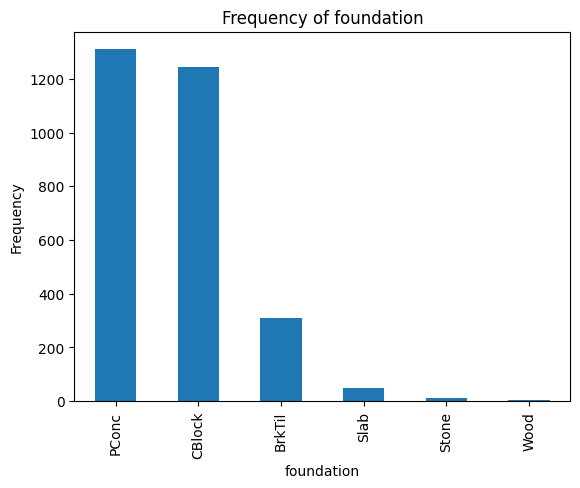

In [29]:

df['Foundation'].value_counts().plot(kind='bar')

plt.xlabel("foundation")
plt.ylabel("Frequency")
plt.title("Frequency of foundation")
plt.show()

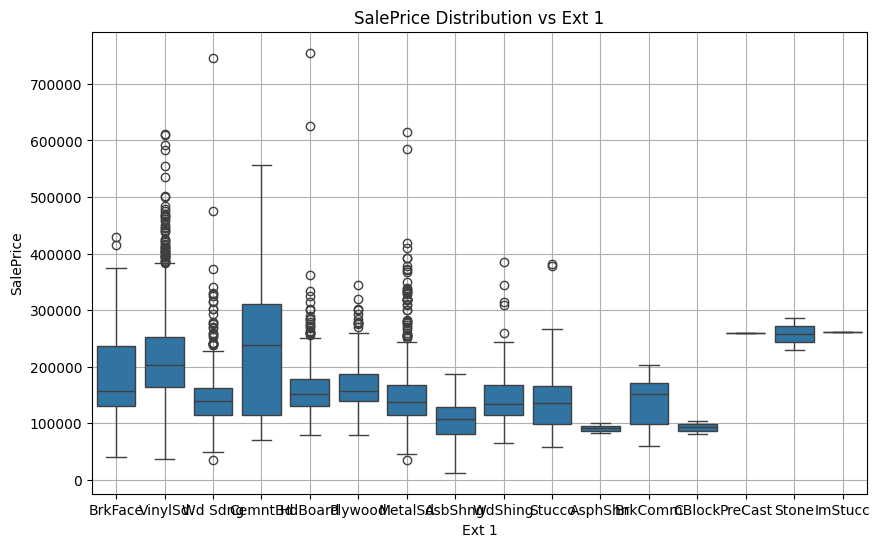

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Exterior 1st', y='SalePrice')
plt.title("SalePrice Distribution vs Ext 1")
plt.xlabel("Ext 1")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

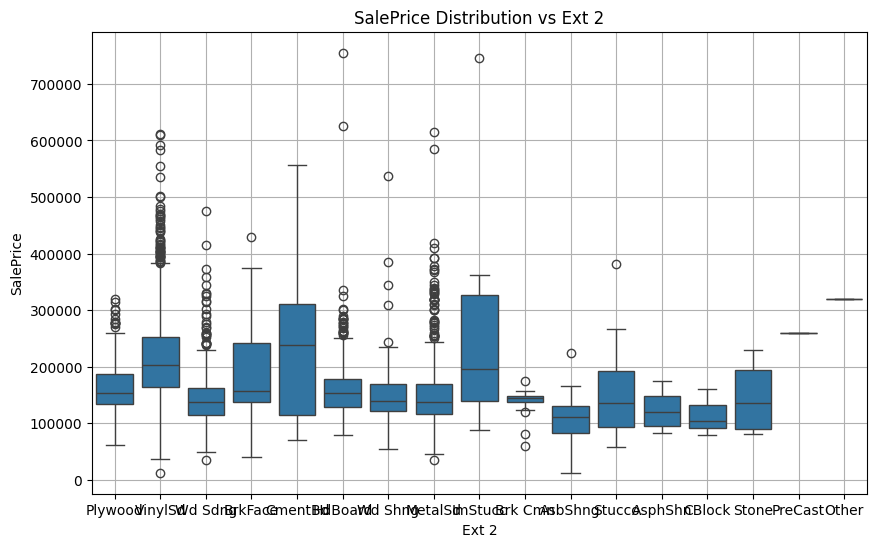

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Exterior 2nd', y='SalePrice')
plt.title("SalePrice Distribution vs Ext 2")
plt.xlabel("Ext 2")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

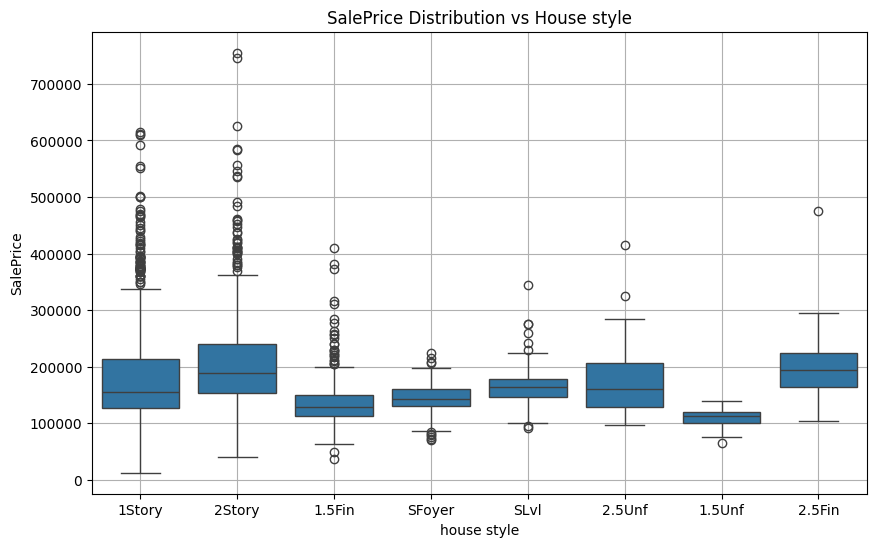

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='House Style', y='SalePrice')
plt.title("SalePrice Distribution vs House style")
plt.xlabel("house style")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

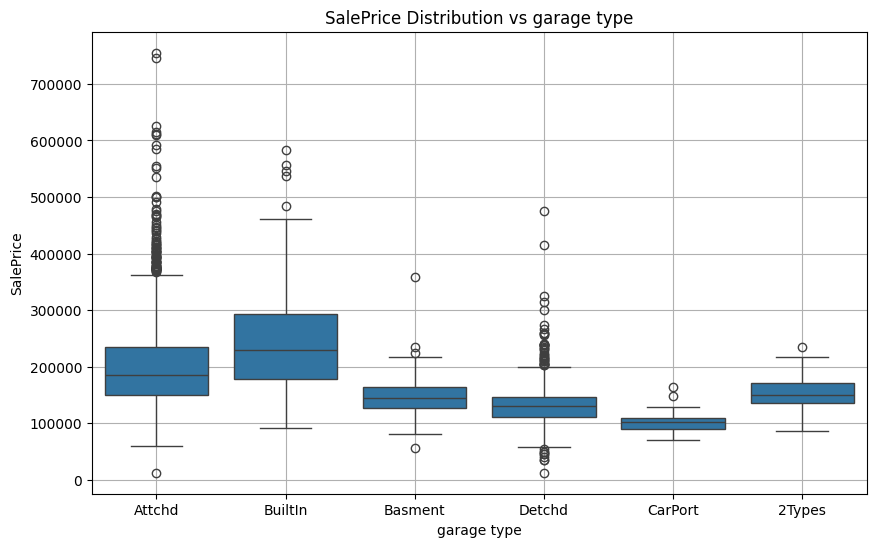

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Garage Type', y='SalePrice')
plt.title("SalePrice Distribution vs garage type")
plt.xlabel("garage type")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

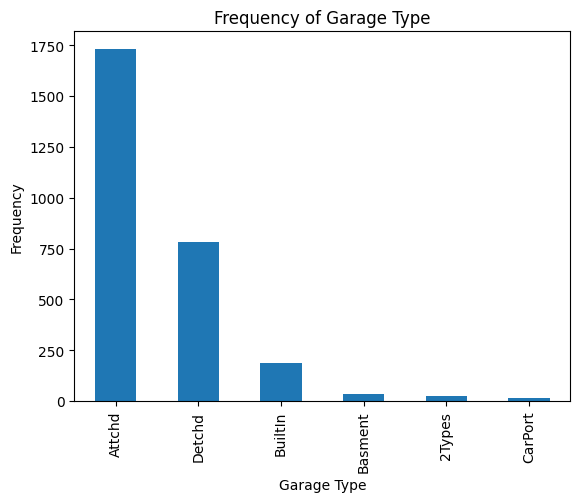

In [34]:
df['Garage Type'].value_counts().plot(kind='bar')

plt.xlabel("Garage Type")
plt.ylabel("Frequency")
plt.title("Frequency of Garage Type")
plt.show()

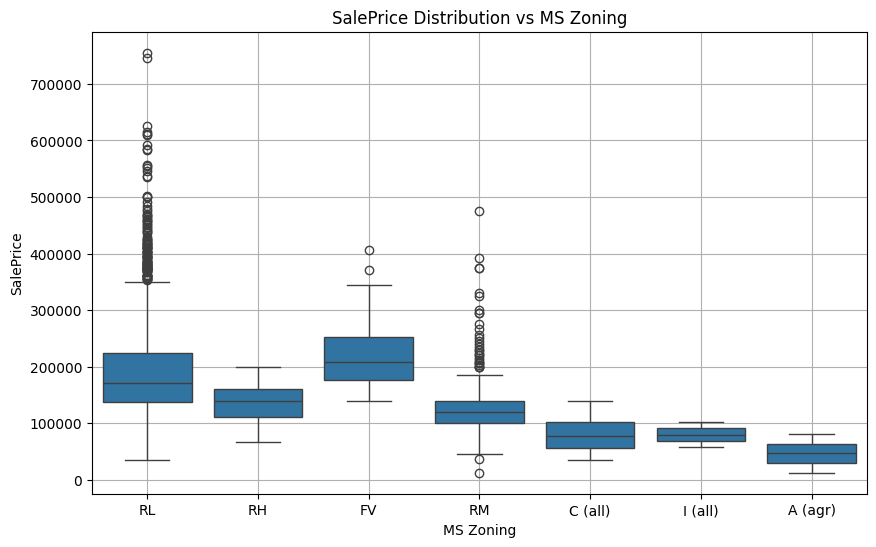

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='MS Zoning', y='SalePrice')
plt.title("SalePrice Distribution vs MS Zoning")
plt.xlabel("MS Zoning")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

Silhouette score: 0.09668766244421903


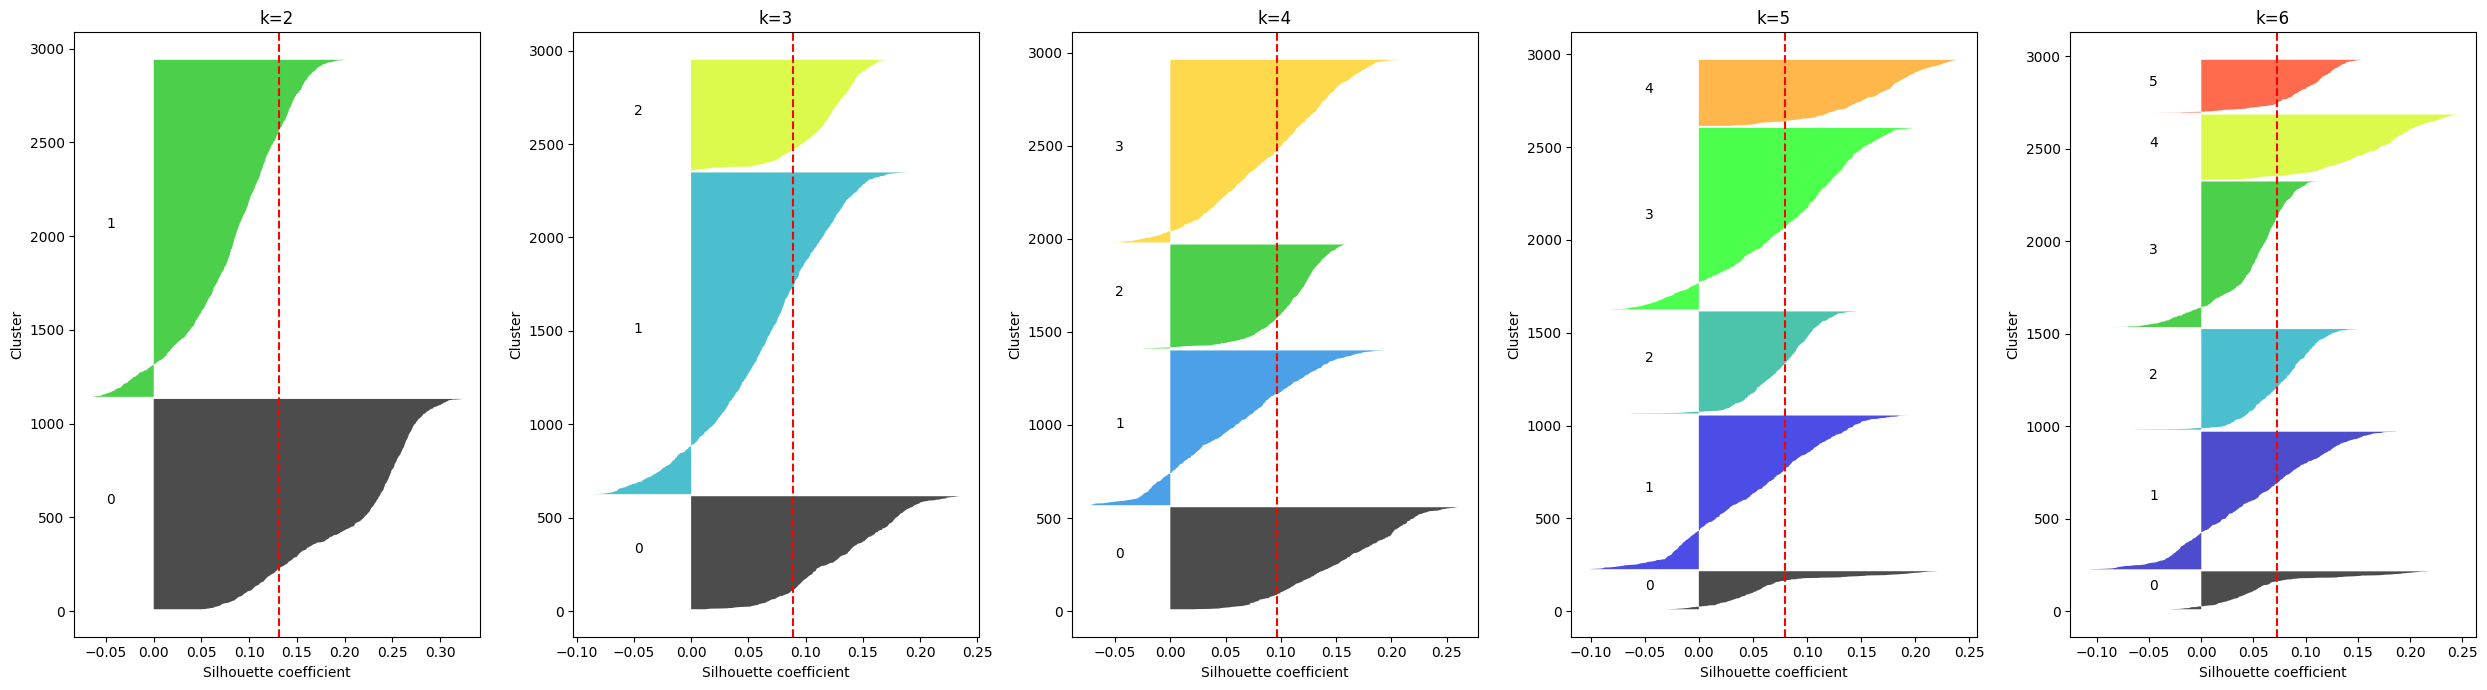

In [36]:
score = silhouette_score(X_pca_95, labels)
print("Silhouette score:", score)
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_95)
    
    silhouette_vals = silhouette_samples(X_pca_95, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [37]:
loadings = pca_n_95.components_.T * np.sqrt(pca_n_95.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=num_cols 
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61
MS SubClass,-0.004299,-0.097803,-0.069014,-0.025881,-0.067760,-0.020960,0.051785,0.048012,-0.013229,-0.025796,...,-0.004521,-0.013184,0.005432,0.004939,-0.003082,-0.000758,0.003765,-0.000681,-0.004889,0.008416
Lot Frontage,0.016639,0.021934,-0.006194,-0.003675,0.015916,-0.001815,-0.011245,-0.010448,0.005816,-0.001998,...,-0.008994,0.005719,0.005932,0.010145,-0.002960,-0.004639,0.002645,0.002976,-0.004195,0.000117
Lot Area,0.003613,0.008258,-0.004451,-0.002436,0.006045,0.000042,-0.006225,-0.000364,0.000609,-0.001813,...,0.002016,0.001167,0.000537,0.003286,0.000151,-0.003886,0.001743,-0.000749,-0.000516,-0.000246
Street,0.004574,0.000518,-0.002193,0.001795,-0.000698,0.001059,0.000458,-0.001330,0.001330,0.003128,...,0.002476,-0.002225,-0.000832,-0.002092,0.005419,-0.002118,0.000590,-0.004084,-0.000066,0.003287
Lot Shape,-0.156597,-0.125572,0.118351,-0.001627,-0.023502,0.001730,0.210490,-0.063639,0.167985,0.022677,...,0.001590,0.002395,0.001308,0.001688,-0.000091,-0.000080,0.002434,-0.000157,0.002392,0.000855


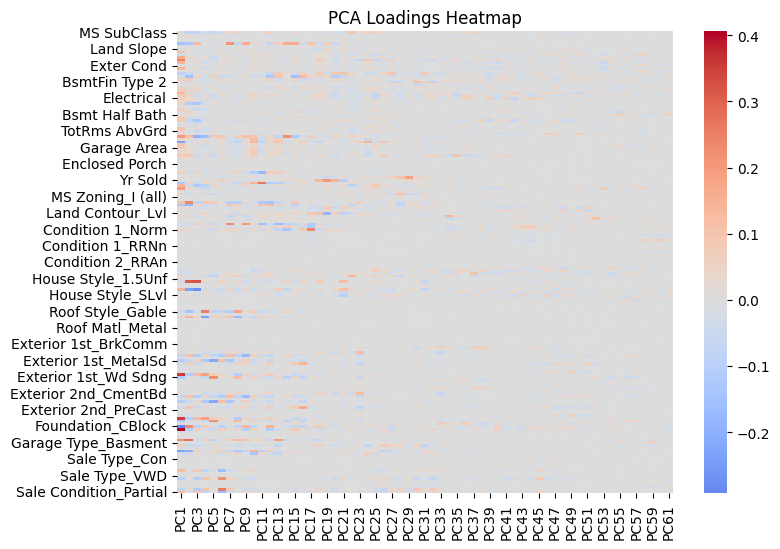

In [39]:
def top_features(pc, n=10):
    return loadings_df[pc].abs().sort_values(ascending=False).head(n)

top_features("PC1", 10)
top_features("PC2", 10)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()

nu stiu daca e necesar acest heatmap, la toate va fi lfl, analog loadings
minmax scaler :0 

**Elbow, silhouette, scatter for 98%**

In [66]:
ndata = pd.read_csv('cleanedData.csv')
ndata = ndata.drop("Order", axis = 'columns')
ndata = ndata.drop("PID", axis = 'columns')
from scipy.stats.mstats import winsorize #scoatem 5% din ambele capete pentru outliers
ndata['GrLivArea_winsor'] = winsorize(ndata['Gr Liv Area'], limits=[0.05, 0.05])

outliers = pd.concat([
    ndata[(ndata['Overall Qual'] == 6) & (ndata['SalePrice'] > 400000)],
    ndata[(ndata['Overall Qual'] == 8) & (ndata['SalePrice'] > 500000)],
    ndata[(ndata['Overall Qual'] == 9) & (ndata['SalePrice'] < 200000)],
    ndata[(ndata['Gr Liv Area'] > 4100) & (ndata['SalePrice'] < 3e5)],
    ndata[(ndata['Overall Cond'] == 2) & (ndata['SalePrice'] > 3e5)],
    ndata[(ndata['Overall Cond'] == 6) & (ndata['SalePrice'] > 7e5)]
    ]).sort_index().drop_duplicates()
ndata = ndata.drop(outliers.index)

avg_price_at_neighborhood = ndata.groupby('Neighborhood', as_index=False)['SalePrice'].mean().rename({'SalePrice' : 'avg_price_at_neighborhood'}, axis=1)
ndata = ndata.merge(avg_price_at_neighborhood, how='left', on='Neighborhood')
ndata = ndata.drop('Neighborhood', axis=1)

In [67]:
len(ndata)

2922

In [68]:
houses1 = ndata[(ndata["Foundation"] == 'PConc') & (ndata["Exterior 1st"] == 'VinylSd') & (ndata["Exterior 2nd"] == 'VinylSd') & (ndata["Garage Type"] == 'Attchd') & (ndata["House Style"] == '1Story') & (ndata["MS Zoning"] == 'RL') ]
len(houses1)
house_c1 = houses1.iloc[[0]] #dataframe
house_c1

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,HasFence,GrLivArea_winsor,avg_price_at_neighborhood
35,20,RL,98.0,11478,1,Reg,Lvl,AllPub,Inside,Gtl,...,NoFence,0,5,2010,WD,Normal,306000,0,1704,322018.26506


In [69]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_features = [
    'Lot Shape',
    'Utilities',
    'Land Slope',
    'Exter Qual',
    'Exter Cond',
    'Heating QC',
    'Electrical',
    'Functional',
    'Paved Drive',
    'Bsmt Exposure',
       'BsmtFin Type 1', 
       'BsmtFin Type 2',
       'Garage Finish',
       'Fence'
]
nominal_features = [
    'MS Zoning',
    'Land Contour',
    'Lot Config',
    'Condition 1',
    'Condition 2',
    'Bldg Type',
    'House Style',
    'Heating',
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Foundation',
    'Garage Type',
    'Sale Type', 'Sale Condition'
]
h1_encoded = house_c1.copy()

# Ordinal encoding
oe = OrdinalEncoder()
for col in ordinal_features:
  h1_encoded[col] = oe.fit_transform(h1_encoded[col].values.reshape(-1, 1))

# h1_encoded.sample(10)

# Nominal encoding
ohe = OneHotEncoder(drop="first", sparse_output=False)
encoded = ohe.fit_transform(h1_encoded[nominal_features])

ohe_encoded_h1 = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(nominal_features), index=h1_encoded.index)

house_c1 = pd.concat([h1_encoded.drop(columns=nominal_features), ohe_encoded_h1], axis=1)

house_c1


,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,3Ssn Porch,Screen Porch,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,HasFence,GrLivArea_winsor,avg_price_at_neighborhood
35,20,98.0,11478,1,0.0,0.0,0.0,8,5,2007,...,0,0,0.0,0,5,2010,306000,0,1704,322018.26506


In [59]:
from sklearn.preprocessing import MinMaxScaler

h1_mm = house_c1.copy()


# - MinMaxScaler
min_max_scaler = MinMaxScaler()
# Fit and transform the entire dataset
mm_scaled_data = min_max_scaler.fit_transform(h1_mm)
# Convert back to DataFrame
h1_mm = pd.DataFrame(mm_scaled_data, columns=h1_mm.columns)
house_c1 = h1_mm

In [70]:
features_to_remove =['Land Contour_HLS', 'Bsmt Unf SF', 'Fence', 'Exterior 2nd_CmentBd', 'Lot Config_CulDSac', 'Bedroom AbvGr', 'Exterior 1st_CemntBd', 'Condition 2_PosA', 'Functional', 'Screen Porch', 'MS Zoning_FV', 'Condition 1_Norm', 'Condition 1_PosN', 'Condition 2_PosN', 'Heating_GasA', 'Condition 1_PosA', 'Roof Matl_WdShngl', 'Exterior 2nd_ImStucc', 'Land Slope', 'BsmtFin Type 2', 'Street', 'Bldg Type_TwnhsE', 'Roof Matl_WdShake', 'Mo Sold', '3Ssn Porch', 'Exterior 2nd_Other', 'Land Contour_Low', 'House Style_2.5Fin', 'Exterior 1st_Stone', 'Bsmt Cond', 'Exter Cond', 'Sale Type_Con', 'Exterior 1st_ImStucc', 'Exterior 2nd_PreCast', 'Exterior 1st_PreCast', 'Condition 1_RRNn', 'Roof Matl_Membran', 'Lot Config_FR3', 'Exterior 2nd_BrkFace', 'Exterior 1st_BrkFace', 'BsmtFin SF 2', 'Roof Style_Shed', 'Roof Matl_Tar&Grv', 'Sale Type_CWD', 'Condition 2_RRAe', 'Condition 1_RRAn', 'Foundation_Wood', 'Roof Matl_Metal', 'Sale Type_ConLI', 'Roof Style_Mansard', 'Roof Matl_Roll', 'Sale Type_VWD', 'Condition 2_RRAn', 'Lot Config_FR2', 'House Style_2.5Unf', 'Heating_OthW', 'Misc Val', 'Exterior 2nd_Stone', 'Sale Condition_Alloca', 'Condition 1_RRNe', 'House Style_1Story', 'Condition 2_Norm', 'Foundation_Stone', 'Exterior 1st_BrkComm', 'Heating_GasW', 'Exterior 2nd_AsphShn', 'Exterior 2nd_CBlock', 'Condition 2_RRNn', 'Exterior 1st_CBlock', 'Exterior 1st_AsphShn', 'Yr Sold', 'Utilities', 'MS Zoning_I (all)', 'Sale Condition_Family', 'Low Qual Fin SF', 'Sale Type_ConLw', 'House Style_SLvl', 'Sale Type_Oth', 'Garage Type_Basment', 'Condition 2_Feedr', 'Exterior 1st_Plywood', 'Bsmt Half Bath', 'Roof Style_Gambrel', 'Exterior 1st_Stucco', 'Exterior 2nd_Brk Cmn', 'Exterior 1st_WdShing', 'Exterior 2nd_Stucco', 'Condition 1_RRAe', 'MS Zoning_RH', 'Sale Condition_AdjLand', 'Heating_Wall', 'Lot Config_Inside', 'Sale Type_ConLD', 'Exterior 2nd_Wd Shng', 'Exterior 2nd_Plywood', 'Heating_Grav', 'Garage Type_CarPort', 'House Style_1.5Unf', 'Land Contour_Lvl', 'House Style_SFoyer', 'MS SubClass', 'Bldg Type_Duplex', 'Exterior 2nd_HdBoard', 'Bldg Type_2fmCon', 'Overall Cond', 'Bldg Type_Twnhs', 'Exterior 1st_HdBoard', 'Foundation_Slab', 'Condition 1_Feedr', 'MS Zoning_C (all)', 'Kitchen AbvGr', 'Enclosed Porch', 'Exterior 2nd_MetalSd', 'BsmtFin Type 1', 'Exterior 1st_MetalSd', 'Sale Condition_Normal', 'Exterior 2nd_Wd Sdng', 'Exterior 1st_Wd Sdng', 'HasFence']
len(features_to_remove)
h1_reduced = house_c1.drop(columns=features_to_remove, errors='ignore')

In [71]:
h1_reduced

,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Year Built,Year Remod/Add,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,...,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,SalePrice,GrLivArea_winsor,avg_price_at_neighborhood
35,98.0,11478,0.0,8,2007,2008,0.0,4,0.0,1218.0,...,3.0,772.0,3,3,0.0,0,50,306000,1704,322018.26506


In [62]:
len(features_to_remove)

119